In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_excel('test_assignment.xlsx')

In [3]:
data.head()

,String,Tag
0,"3GPP Technical Specification Group, ""Spatial c...",1.0
1,"3GPP Technical Specification Group, ""Spatial c...",1.0
2,"3GPP Technical Specification Group, ""Spatial c...",1.0
3,"3GPP Technical Specification Group, ""Spatial c...",1.0
4,"3GPP TR 25.876 V7.0.0 (2007-03), Technical Rep...",2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6921 entries, 0 to 6920
Data columns (total 2 columns):
String    6921 non-null object
Tag       6731 non-null float64
dtypes: float64(1), object(1)
memory usage: 108.3+ KB


In [5]:
data.shape

(6921, 2)

In [6]:
data.String.nunique()

6920

In [7]:
data.Tag.nunique()

1080

In [8]:
data.isnull().sum()

String      0
Tag       190
dtype: int64

In [9]:
data_filter = data.dropna(axis=0)

In [10]:
data_filter.shape

(6731, 2)

In [11]:
data_filter.nunique()

String    6730
Tag       1080
dtype: int64

In [12]:
data_filter.drop_duplicates(subset ="String", inplace=True)

C:\Users\abhishek.tyagi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_filter.shape

(6730, 2)

In [14]:
data_filter.head()

,String,Tag
0,"3GPP Technical Specification Group, ""Spatial c...",1.0
1,"3GPP Technical Specification Group, ""Spatial c...",1.0
2,"3GPP Technical Specification Group, ""Spatial c...",1.0
3,"3GPP Technical Specification Group, ""Spatial c...",1.0
4,"3GPP TR 25.876 V7.0.0 (2007-03), Technical Rep...",2.0


In [15]:
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6730 entries, 0 to 6920
Data columns (total 2 columns):
String    6730 non-null object
Tag       6730 non-null float64
dtypes: float64(1), object(1)
memory usage: 157.7+ KB


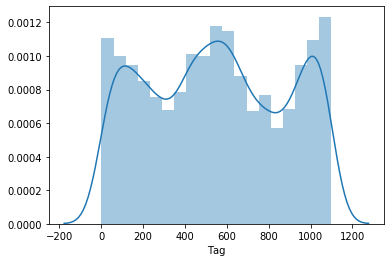

In [16]:
sns.distplot(data_filter.Tag)

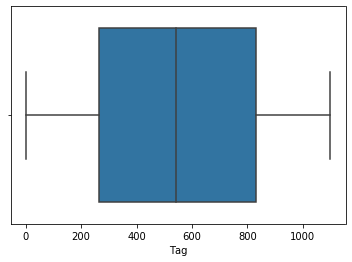

In [17]:
sns.boxplot(data_filter.Tag)

In [18]:
import re
X = []
sentences = list(data_filter.String)
for sen in sentences:
    X.append(sen)

y = data_filter.Tag.values

In [19]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.models import Model
from keras.preprocessing.text import Tokenizer
from keras.optimizers import Adam

Using TensorFlow backend.


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [21]:
tokenizer = Tokenizer(num_words=len(X))
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1


X_train = pad_sequences(X_train, padding='post')
X_test = pad_sequences(X_test, padding='post')

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5384, 55)
(1346, 49)
(5384,)
(1346,)


In [30]:
model = Sequential([Dense(units=32, input_dim=55, kernel_initializer='he_uniform', activation='relu'), Dense(units=16, kernel_initializer='he_uniform', activation='relu'), Dense(units=1, kernel_initializer='random_uniform', activation='sigmoid')])

In [31]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5384/5384 [==============================] - 1s 140us/step - loss: -335353215.8966 - accuracy: 0.0011
Epoch 2/10
5384/5384 [==============================] - 1s 114us/step - loss: -5976043936.5706 - accuracy: 0.0011
Epoch 3/10
5384/5384 [==============================] - 1s 112us/step - loss: -24973493618.3061 - accuracy: 0.0011
Epoch 4/10
5384/5384 [==============================] - 1s 111us/step - loss: -62086137698.9005 - accuracy: 0.0011
Epoch 5/10
5384/5384 [==============================] - 1s 112us/step - loss: -119898796903.8455 - accuracy: 0.0011
Epoch 6/10
5384/5384 [==============================] - 1s 112us/step - loss: -200679632212.8261 - accuracy: 0.0011
Epoch 7/10
5384/5384 [==============================] - 1s 112us/step - loss: -305397693201.1174 - accuracy: 0.0011
Epoch 8/10
5384/5384 [==============================] - 1s 111us/step - loss: -435292610791.2748 - accuracy: 0.0011
Epoch 9/10
5384/5384 [==============================] - 1s 116us/step - loss: -

In [33]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
ohe = OneHotEncoder()
y_train_ohe = ohe.fit_transform(y_train.reshape(-1,1))
y_test_ohe = ohe.fit_transform(y_test.reshape(-1,1))
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(5384, 1073)
(1346, 710)


C:\Users\abhishek.tyagi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\abhishek.tyagi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence

In [36]:
model = Sequential([Dense(units=32, input_dim=55, kernel_initializer='he_uniform', activation='relu'), Dense(units=16, kernel_initializer='he_uniform', activation='relu'), Dense(units=1073, kernel_initializer='random_uniform', activation='sigmoid')])

In [38]:
model.compile(Adam(lr=0.001), loss='binary_crossentropy',metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train_ohe, batch_size=10, epochs=10)

Epoch 1/10
5384/5384 [==============================] - 1s 218us/step - loss: 0.3439 - accuracy: 0.9848
Epoch 2/10
5384/5384 [==============================] - 1s 227us/step - loss: 0.0267 - accuracy: 0.9985
Epoch 3/10
5384/5384 [==============================] - 1s 201us/step - loss: 0.0173 - accuracy: 0.9987
Epoch 4/10
5384/5384 [==============================] - 1s 201us/step - loss: 0.0134 - accuracy: 0.9987
Epoch 5/10
5384/5384 [==============================] - 1s 202us/step - loss: 0.0115 - accuracy: 0.9988
Epoch 6/10
5384/5384 [==============================] - 1s 201us/step - loss: 0.0103 - accuracy: 0.9988
Epoch 7/10
5384/5384 [==============================] - 1s 202us/step - loss: 0.0094 - accuracy: 0.9988
Epoch 8/10
5384/5384 [==============================] - 1s 235us/step - loss: 0.0088 - accuracy: 0.9988
Epoch 9/10
5384/5384 [==============================] - 1s 221us/step - loss: 0.0082 - accuracy: 0.9989
Epoch 10/10
5384/5384 [==============================] - 1s 204u

In [57]:
from sklearn.metrics import mean_squared_error, r2_score